# Lab 3: CNN for Handwritted Digit Recognition


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Input, Flatten, Dense, BatchNormalization, Conv2D, MaxPool2D, Activation, MaxPooling2D, Dropout,AveragePooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

import matplotlib.pyplot as plt
np.random.seed(42)
#tf.random.set_seed(42)

Downloading the MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

6


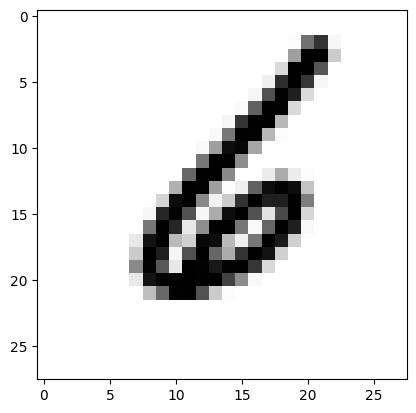

In [5]:
image_index = 999
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

Preprocessing the data

In [6]:
#Reshaping the array to 4-dims
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Converting the type to 'float'
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input value (input value range: {0,255})
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Defining the CNN model

In [7]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3),padding='same',strides=1, input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model description

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5488)              0         
                                                                 
 dense (Dense)               (None, 128)               702592    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

Running the CNN model

In [9]:
optimizer = keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    )
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 16s 4ms/step - loss: 0.1998 - accuracy: 0.9411 - val_loss: 0.0750 - val_accuracy: 0.9791
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0701 - accuracy: 0.9789 - val_loss: 0.0598 - val_accuracy: 0.9826
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.0563 - val_accuracy: 0.9846
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0355 - accuracy: 0.9880 - val_loss: 0.0526 - val_accuracy: 0.9846
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0511 - val_accuracy: 0.9853


Reference:

[1] [Keras loss functions](https://keras.io/api/losses/)

[2] [Keras optimizers](https://keras.io/api/optimizers/)

[3] [Keras metrics](https://keras.io/api/metrics/)

Evaluate the model

In [10]:
model.metrics_names

['loss', 'accuracy']

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0463 - accuracy: 0.9868


[0.04627275466918945, 0.9868000149726868]

conv2d
[[[-0.00173481]
  [ 0.03179832]
  [ 0.1693888 ]]

 [[ 0.16481833]
  [-0.10597431]
  [-0.28968364]]

 [[ 0.15046895]
  [-0.05762265]
  [ 0.05727031]]]
max_pooling2d
flatten
dense
dropout
dense_1


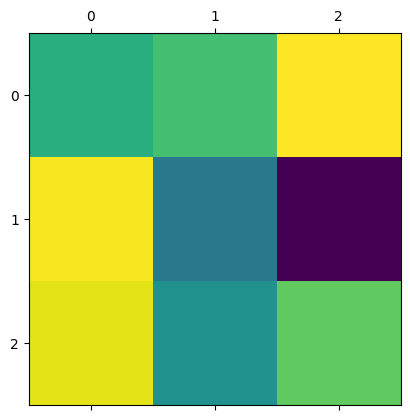

In [12]:
for layer in model.layers:
    print(layer.name)
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    plt.matshow(filters[:,:,:,0].reshape(3,3))
    print(filters[:,:,:,0])

In [13]:
def plotloss(history,both = True):
    plt.plot(history.history['loss'])
    if both:
        plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    if both:
        plt.legend(['train', 'validation'])
    plt.show()

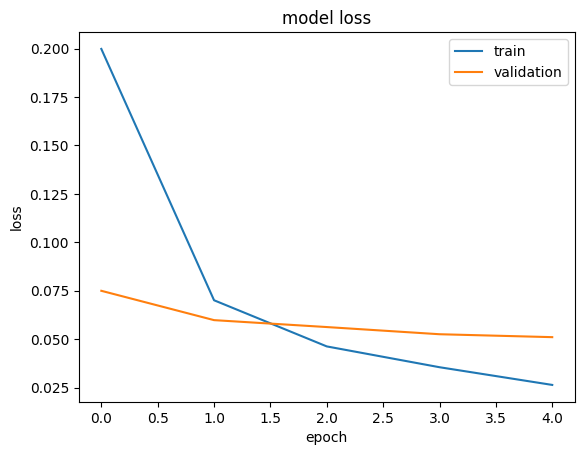

In [14]:
plotloss(history,True)

1/1 [==============================] - 0s 118ms/step
(1, 10)
0 2.3695014e-13
1 3.3649591e-10
2 5.3781946e-10
3 6.7654207e-09
4 3.629507e-15
5 3.1489002e-14
6 9.297355e-20
7 1.0
8 5.5233257e-12
9 9.291752e-09
--------------
7
7


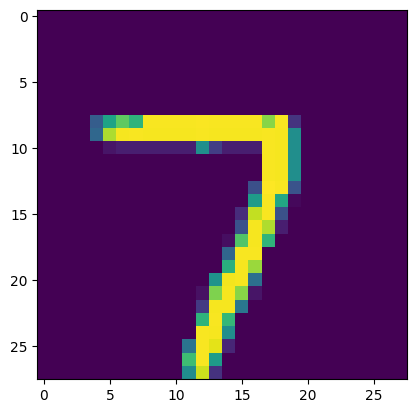

In [15]:
image_index = 3400
plt.imshow(x_test[image_index].reshape(28, 28))#,cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.shape)
for i in range(pred.shape[1]):
    print (i,pred[0,i])
#print(pred)
print('--------------')
print(pred.argmax())
print(y_test[image_index])

## Lab
### Task #1
- Implement LeNet on this task (the final layer should be softmax)
- Plot the loss after each epoch
- Display the kernel/filters of the $1^{st}$ conv layer
- Show the performance
<img src='lenet.png'>

#### Resources
- https://keras.io/
- https://www.tensorflow.org/

Start your code here:
    

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [19]:
# Define the LeNet model
model = models.Sequential()
model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 0.2344 - accuracy: 0.9268 - val_loss: 0.0881 - val_accuracy: 0.9724
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0810 - accuracy: 0.9740 - val_loss: 0.0996 - val_accuracy: 0.9679
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0566 - accuracy: 0.9819 - val_loss: 0.0609 - val_accuracy: 0.9839
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0455 - accuracy: 0.9850 - val_loss: 0.0690 - val_accuracy: 0.9808
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0367 - accuracy: 0.9882 - val_loss: 0.0506 - val_accuracy: 0.9857
Epoch 6/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0295 - accuracy: 0.9904 - val_loss: 0.0553 - val_accuracy: 0.9846
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0250 - accuracy: 0.9921 - val_loss: 0.0513 - val_accurac

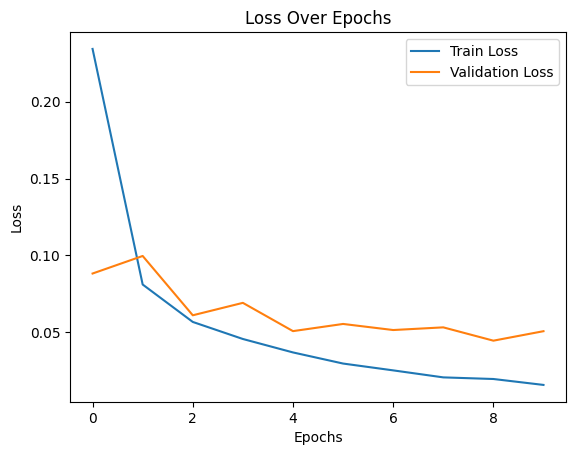

In [20]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and plot the loss
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

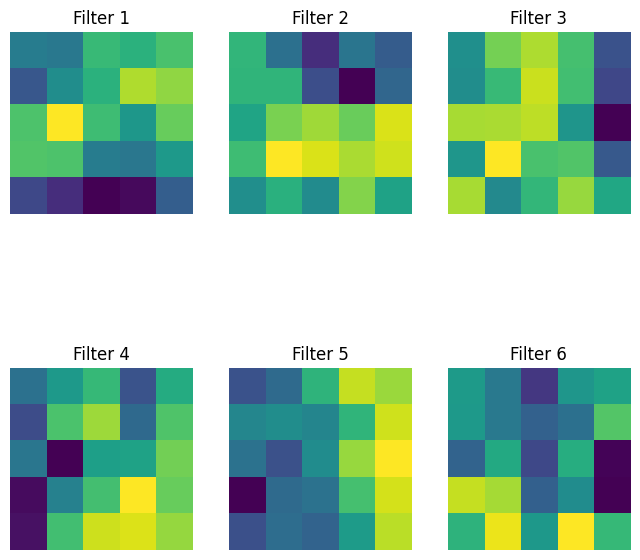

In [21]:
# Display the kernel/filters of the 1st convolutional layer
first_conv_layer = model.layers[0]
weights, _ = first_conv_layer.get_weights()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(weights[:, :, 0, i], cmap='viridis')
    plt.title(f'Filter {i + 1}')
    plt.axis('off')
plt.show()

In [22]:
# Evaluate the model's performance on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Loss: 0.0401
Test Accuracy: 98.92%


### Task #2
- Classify images into several categories
- Complete a model to classify each image into the 10 classes described below
- Compile and train the model
- Print the summary of the model
- Evaluate the model
    - Show the model loss and accuracy
    - Plot the train and validation loss
    - For 4 samples from the test set
        - Display the image
        - Print the true label in text
        - Print the output probabilities of all the classes
        - Print the predicted label in text

#### Load the dataset and normalize the pixel values

In [59]:
cifar = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train/255.0, X_test/255.0

input_shape = (32, 32, 3)


#### Define the output classes

In [60]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#### Display sample images

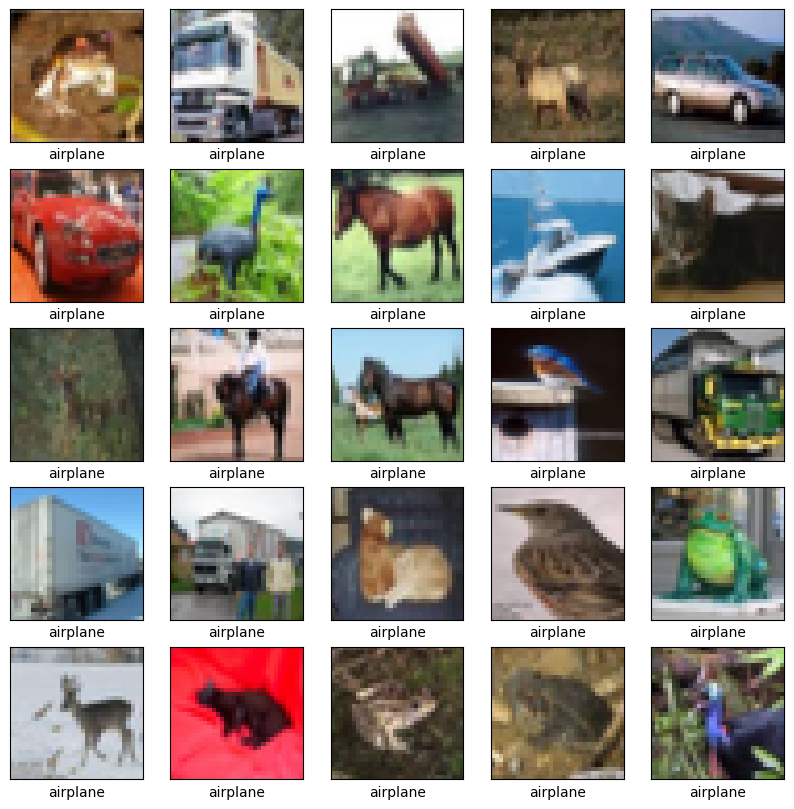

In [61]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

#### Build the model

In [62]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation="softmax"),
])

#### Train the model and achieve accuracy greater than 75%

- Use validation set

In [63]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.1)

Epoch 1/20
352/352 [==============================] - 4s 7ms/step - loss: 1.6694 - accuracy: 0.4034 - val_loss: 1.4088 - val_accuracy: 0.5034
Epoch 2/20
352/352 [==============================] - 2s 5ms/step - loss: 1.3131 - accuracy: 0.5403 - val_loss: 1.2332 - val_accuracy: 0.5730
Epoch 3/20
352/352 [==============================] - 2s 5ms/step - loss: 1.1947 - accuracy: 0.5851 - val_loss: 1.1709 - val_accuracy: 0.5984
Epoch 4/20
352/352 [==============================] - 3s 8ms/step - loss: 1.1204 - accuracy: 0.6120 - val_loss: 1.1074 - val_accuracy: 0.6198
Epoch 5/20
352/352 [==============================] - 3s 8ms/step - loss: 1.0585 - accuracy: 0.6349 - val_loss: 1.0387 - val_accuracy: 0.6486
Epoch 6/20
352/352 [==============================] - 2s 5ms/step - loss: 1.0085 - accuracy: 0.6512 - val_loss: 1.0246 - val_accuracy: 0.6478
Epoch 7/20
352/352 [==============================] - 2s 5ms/step - loss: 0.9747 - accuracy: 0.6655 - val_loss: 0.9998 - val_accuracy: 0.6560
Epoch 

#### Print the model summary

In [64]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 2304)              0         
                                                                 
 dense_12 (Dense)            (None, 10)               

#### Evaluate the model

- plot training and validation loss
- print accuracy

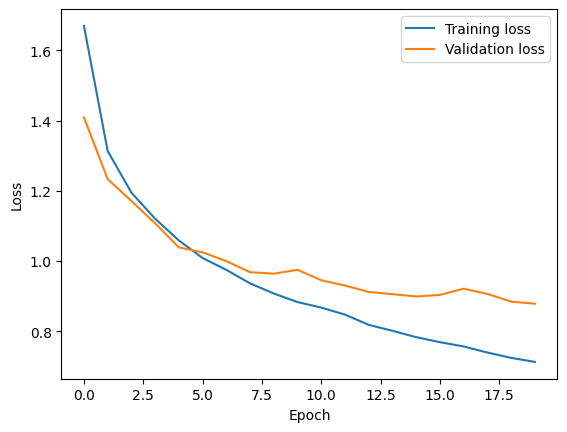

313/313 [==============================] - 1s 4ms/step - loss: 0.8980 - accuracy: 0.6994
Test accuracy: 0.699400007724762


In [66]:
# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Evaluate the model on the test data to obtain the test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

### Taking 4 samples from the test set
- display the image
- print the true label
- print the output probability distribution of the classes
- print the predicted class

Image: 1
True label: ship


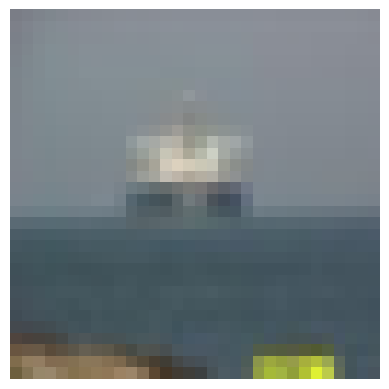

1/1 [==============================] - 0s 135ms/step
Predictions: [[1.3833326e-01 7.0694491e-04 3.6822755e-02 2.4015550e-03 5.1291492e-03
  8.2004617e-04 1.7301891e-04 6.7551655e-04 8.1479555e-01 1.4215261e-04]]
Predicted class: ship
Image: 2
True label: truck


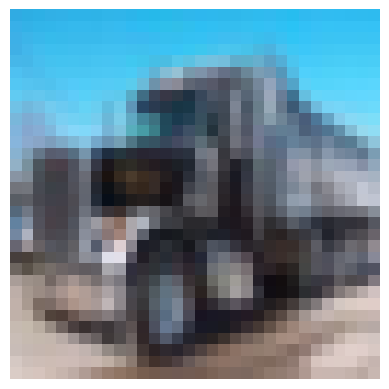

1/1 [==============================] - 0s 29ms/step
Predictions: [[3.8619233e-05 3.6137211e-05 1.8245244e-06 1.1821266e-05 2.5192005e-06
  2.3577966e-05 4.1049288e-06 2.1683765e-05 6.9224848e-07 9.9985898e-01]]
Predicted class: truck
Image: 3
True label: truck


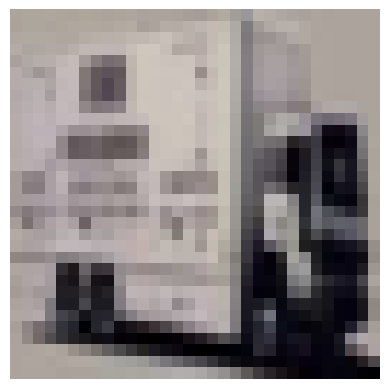

1/1 [==============================] - 0s 28ms/step
Predictions: [[2.4467317e-04 5.5864435e-03 3.2347569e-04 1.7288128e-03 1.8268288e-04
  9.9935707e-05 5.3214910e-04 3.1137140e-04 6.6106757e-03 9.8437977e-01]]
Predicted class: truck
Image: 4
True label: frog


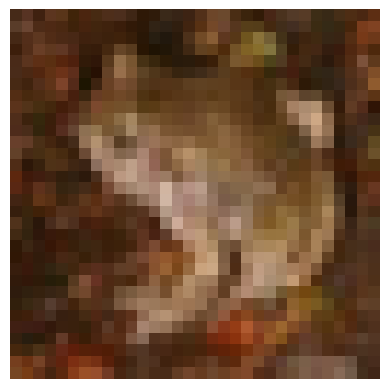

1/1 [==============================] - 0s 39ms/step
Predictions: [[4.0414020e-07 4.0404989e-06 2.6505342e-04 1.0908572e-02 7.9058475e-05
  5.3377991e-04 9.8817271e-01 3.3915869e-05 4.5768189e-07 2.0676068e-06]]
Predicted class: frog


In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Taking 4 samples from the test set
sample_indexes = np.random.choice(range(len(X_test)), size=4, replace=False)
sample_images = X_test[sample_indexes]
sample_labels = y_test[sample_indexes]

for i in range(len(sample_images)):
    print("Image:", i + 1)
    true_label = class_names[sample_labels[i][0]]
    print("True label:", true_label)

    # Display the image
    plt.imshow(sample_images[i])
    plt.axis("off")
    plt.show()

    # Print the output probability distribution of the classes
    predictions = model.predict(np.array([sample_images[i]]))
    print("Predictions:", predictions)

    # Print the predicted class
    predicted_class = np.argmax(predictions)
    predicted_label = class_names[predicted_class]
    print("Predicted class:", predicted_label)